In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
wf=pd.read_csv(r"C:\Users\hp\Downloads\Salary_Data (1).csv")
wf

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
wf.size

60

In [4]:
wf.shape

(30, 2)

In [5]:
wf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [6]:
wf.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [7]:
wf.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [8]:
wf.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


<Axes: >

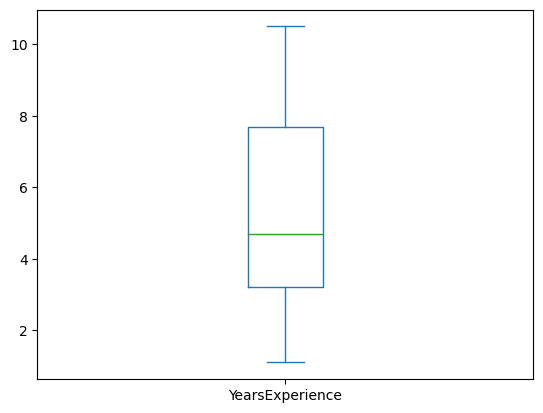

In [9]:
wf['YearsExperience'].plot(kind='box')

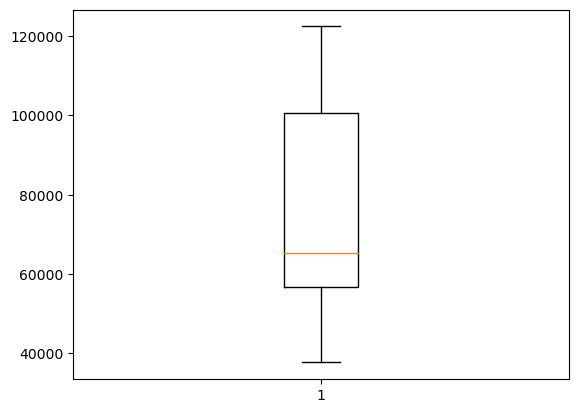

In [10]:
plt.boxplot(wf['Salary'])
plt.show()

In [11]:
X=wf[['YearsExperience']]
y=wf[['Salary']]


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,
                                                    random_state=42)

In [14]:
print(wf.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(30, 2)
(24, 1)
(6, 1)
(24, 1)
(6, 1)


In [15]:
X_train.head()

,YearsExperience
28,10.3
24,8.7
12,4.0
0,1.1
4,2.2


In [16]:
y_train.head()

,Salary
28,122391.0
24,109431.0
12,56957.0
0,39343.0
4,39891.0


In [17]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X_train,y_train)
LR

LinearRegression()

In [18]:
y_prediction=LR.predict(X_test) 

In [19]:
y_test[:10].values,y_prediction[:10]

(array([[112635.],
        [ 67938.],
        [113812.],
        [ 83088.],
        [ 64445.],
        [ 57189.]]),
 array([[115790.21011287],
        [ 71498.27809463],
        [102596.86866063],
        [ 75267.80422384],
        [ 55477.79204548],
        [ 60189.69970699]]))

In [20]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_prediction)
mae=mean_absolute_error(y_test,y_prediction)
rsqur=r2_score(y_test,y_prediction)

In [21]:
print(mse,mae,rsqur)

49830096.85590839 6286.453830757749 0.9024461774180497


In [22]:
rmse=np.sqrt(mse)
rmse

7059.04362190151

In [23]:
wf.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


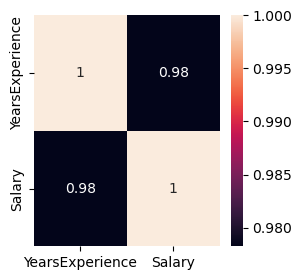

In [24]:
plt.figure(figsize=(3,3))
sns.heatmap(wf.corr(),annot=True)
plt.show()

In [25]:
LR.coef_

array([[9423.81532303]])

In [26]:
LR.intercept_

array([25321.58301178])

In [29]:
import pickle
file_path=open('linear_salary_model.pkl','wb')
model_name=LR
pickle.dump(model_name,file_path)

In [30]:
#predictors=pickle.load(open('linear_salary_model.pkl','rb'))

In [31]:
predictors

LinearRegression()